数据集共有10000个数据。模型训练集共有9000个数据，占总数据集的90%。测试集共有1000个数据，占总数聚集的10%。

测试结果显示：

总测试数据个数：1000
预测正确数据个数：821
预测错误数据个数：179
模型预测准确率：0.82%


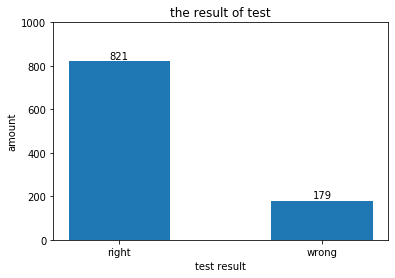

In [4]:
'''
author: 杨斌
ID: 201926205073
date: 2020年12月15日
title: 对银行贷款客户流失数据的预测模型
'''
#----------------------------------------------------------------------------------------------------------------------

#方法构建部分
def average(x, n):       #x为列表，n为列表个数，函数效果为求x的平均值
    total=0
    for i in range(n):
        total+=x[i]
    return total/n

def getTheta(X_b, y):        #X_b为xi的训练集数值构成的矩阵， y为x对应的y的值构成的向量，函数效果为根据X_b和y求出x的参数矩阵
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

def estimate(theta_best, X, n=1):         #预测模型的函数模型，根据参数矩阵和输入的x矩阵，求得对应的预测结果y的向量
    X=np.c_[np.ones(n),X]
    X=X.T
    theta_best=np.array([theta_best])
    return theta_best.dot(X)

#--------------------------------------------------------------------------------------------------------------------

#引入库
import pandas as pd
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

#打开文件
fpath = "C:/Users/25315/Desktop/Churn-Modelling.csv"
f = pd.read_csv(fpath)

#数据清洗部分
#剔除无关数据、相关性低数据（相关性指数低于0.001）、空数据
f.drop(["RowNumber","CustomerId","Surname", "HasCrCard"], axis=1, inplace=True)
f.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
#剔除读取自带的索引index
f=f.reset_index(drop=True)
#字符类型数据替换为数值类型
dic = {"France":1, "Spain":2, "Germany":3}
f["Geography"] = f["Geography"].map(dic)
dicf = {"Female":0, "Male":1}
f["Gender"] = f["Gender"].map(dicf)

#拆分90%作为训练集
n = len(f)
n1 = int(len(f)*0.9)

#数据提取赋值部分
CS = f.loc[:,"CreditScore"]
GY = f.loc[:,"Geography"]
GR = f.loc[:,"Gender"]
AGE = f.loc[:,"Age"]
TE = f.loc[:,"Tenure"]
BL = f.loc[:,"Balance"]
NOP = f.loc[:,"NumOfProducts"]
IAM = f.loc[:,"IsActiveMember"]
ES = f.loc[:,"EstimatedSalary"]
EXIT = f.loc[:,"Exited"]

#训练集数据切分部分
x1 = np.array(list(CS))[:n1]
x2 = np.array(list(GY))[:n1]
x3 = np.array(list(GR))[:n1]
x4 = np.array(list(AGE))[:n1]
x5 = np.array(list(TE))[:n1]
x6 = np.array(list(BL))[:n1]
x7 = np.array(list(NOP))[:n1]
x8 = np.array(list(IAM))[:n1]
x9 = np.array(list(ES))[:n1]
y = np.array(list(EXIT))[:n1]

#模型构建过程
#获得x矩阵
one = np.ones((n1,1))
X_b = np.c_[one,x1,x2,x3,x4,x5,x6,x7,x8,x9]
#带入x矩阵求得参数矩阵theta_best
theta_best = getTheta(X_b,y)

#----------------------------------------------------------------------------------------

#测试部分

#测试集数据切分部分
x1 = np.array(list(CS))[n1:]
x2 = np.array(list(GY))[n1:]
x3 = np.array(list(GR))[n1:]
x4 = np.array(list(AGE))[n1:]
x5 = np.array(list(TE))[n1:]
x6 = np.array(list(BL))[n1:]
x7 = np.array(list(NOP))[n1:]
x8 = np.array(list(IAM))[n1:]
x9 = np.array(list(ES))[n1:]
y = np.array(list(EXIT))[n1:]

#待测数据处理
X_t = np.c_[x1,x2,x3,x4,x5,x6,x7,x8,x9]

#测试过程
es = estimate(theta_best,X_t,int(n*0.1))[0]

#测试结果处理统计
xe = list(map(round, es.tolist()))
re = y-xe
right = re.tolist().count(0)
wrong = int(n*0.1)-right
rp = right/int(n*0.1)

#测试结果展示
print("数据集共有{}个数据。模型训练集共有{}个数据，占总数据集的90%。测试集共有{}个数据，占总数聚集的10%。\n".format(n, int(n*0.9), int(n*0.1)))
print("测试结果显示：\n")
print("总测试数据个数：{}\n预测正确数据个数：{}\n预测错误数据个数：{}\n模型预测准确率：{:.2f}%".format(int(n*0.1), right, wrong, rp))

#测试结果柱状图展示
TR = ["right", "wrong"]
TA = [right, wrong]
plt.title("the result of test") 
plt.xlabel("test result") 
plt.ylabel("amount") 
for a,b in zip(TR,TA):
    plt.text(a, b+2, b, ha='center', va= 'bottom')
plt.ylim([0, 1000])
plt.bar(TR,TA,0.5)
plt.show()

In [14]:
import pandas as pd
data = pd.read_excel("C:\\Users\\25315\\Desktop\\test_result.xls")
print(data)
eno = list(data.loc[:,"eno"])
cno = list(data.loc[:,"cno"])
sno = list(data.loc[:,"sno"])
grade = list(data.loc[:,"grade"])

   eno  cno  sno  grade
0   11   12   13     14
1   21   22   23     24


In [15]:
import pymysql
import pandas as pd

data = pd.read_excel("C:\\Users\\25315\\Desktop\\test_result.xls")
print(data)
eno = list(data.loc[:,"eno"])
cno = list(data.loc[:,"cno"])
sno = list(data.loc[:,"sno"])
grade = list(data.loc[:,"grade"])

dbhost = 'localhost'
dbuser = 'root'
dbpass = '123456'
dbname = 'test_db'

db = pymysql.connect(host=dbhost, user=dbuser, passwd=dbpass, database=dbname)
cursor = db.cursor()
# cursor.execute("SELECT * FROM test_tb")
# data = cursor.fetchall()
# print (data)
sql = "insert into test_db.test_result(`eno`,`cno`,`sno`,`grade`) values "
for index,value in enumerate(sno):
    sql = sql + "({},{},{},{}),".format(eno[index], cno[index], sno[index], grade[index])
sql = sql[:-1] + ";"
    
try:
    cursor.execute(sql)
    db.commit()
except:
    db.rollback()
else:
    print("Insert values Successful! ٩(๑>◡<๑)۶ ")
db.close()

Insert values Successful! :>
